/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


age: 0.0037724511155636086
sex: -1.4889394787378583
cp: 0.8025535156453857
trestbps: -0.011191906870790908
chol: -0.003724331972784094
fbs: -0.04952163488684043
restecg: 0.43573325026487886
thalach: 0.03373407142737897
exang: -1.0497455414183323
oldpeak: -0.4812597854250141
slope: 0.5099327145650895
ca: -0.7233379302488053
thal: -0.9968139197821354


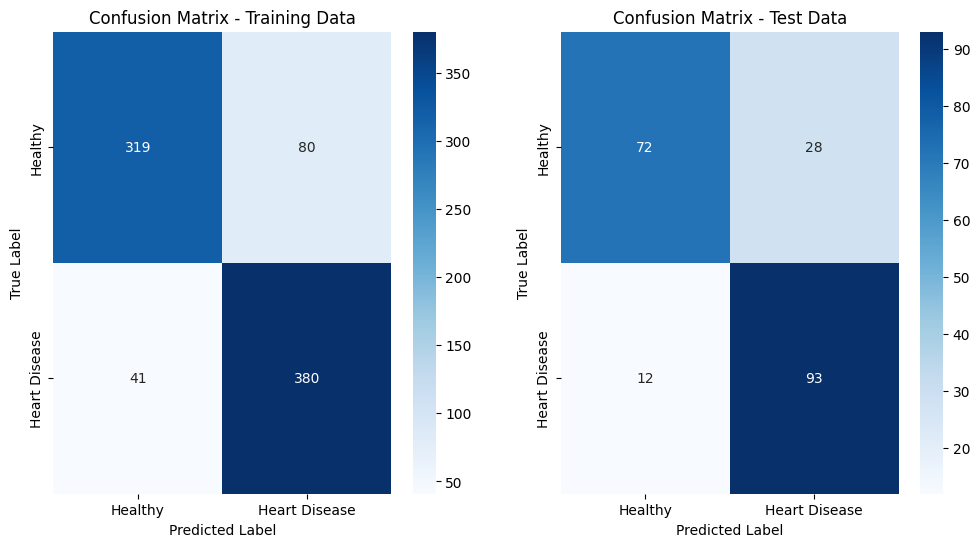

Accuracy on training data is: 0.8524390243902439
Accuracy on test data is: 0.8048780487804879
Classification Report - Training Data:
                precision    recall  f1-score   support

      Healthy       0.89      0.80      0.84       399
Heart Disease       0.83      0.90      0.86       421

     accuracy                           0.85       820
    macro avg       0.86      0.85      0.85       820
 weighted avg       0.86      0.85      0.85       820


Classification Report - Test Data:
                precision    recall  f1-score   support

      Healthy       0.86      0.72      0.78       100
Heart Disease       0.77      0.89      0.82       105

     accuracy                           0.80       205
    macro avg       0.81      0.80      0.80       205
 weighted avg       0.81      0.80      0.80       205



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# DATA COLLECTION and processing
heart_data = pd.read_csv("/content/heart.csv")

# 1- Defect heart 0- Healthy heart splitting the feature and target
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

model = LogisticRegression()

# Training the model with training data
model.fit(x_train, y_train)

# Accessing the coefficients
coefficients = model.coef_[0]
feature_names = x.columns

# Displaying coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

# Model accuracy checking
x_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(x_train_pred, y_train)

x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test)

# Classification report for both training and test data
train_classification_report = classification_report(y_train, x_train_pred, target_names=["Healthy", "Heart Disease"])
test_classification_report = classification_report(y_test, x_test_pred, target_names=["Healthy", "Heart Disease"])

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, x_train_pred)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, x_test_pred)

# Plot confusion matrix for both training and test data in a single plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Training data
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Heart Disease"],
            yticklabels=["Healthy", "Heart Disease"], ax=axes[0])
axes[0].set_title("Confusion Matrix - Training Data")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Test data
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Heart Disease"],
            yticklabels=["Healthy", "Heart Disease"], ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Data")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

print('Accuracy on training data is:', train_accuracy)
print('Accuracy on test data is:', test_accuracy)
print("Classification Report - Training Data:\n", train_classification_report)
print("\nClassification Report - Test Data:\n", test_classification_report)


<ipython-input-2-cd307c5ce8f3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


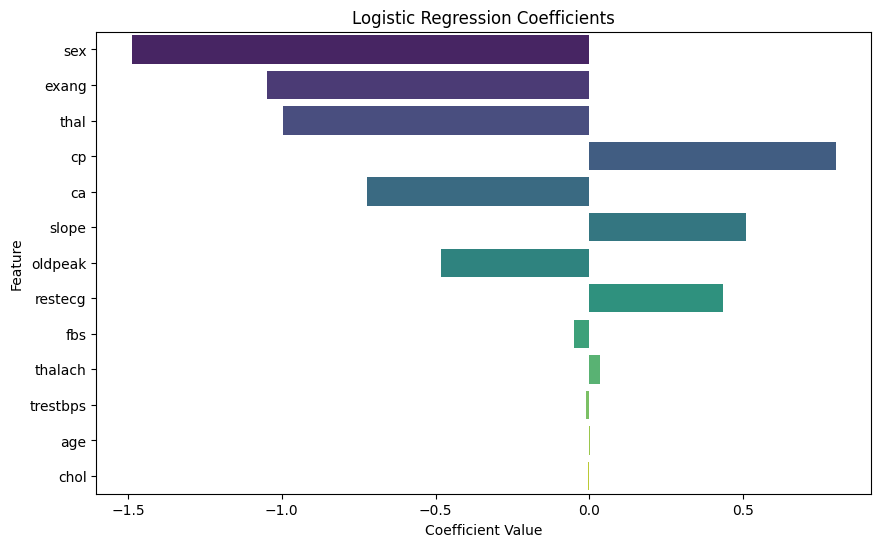

In [2]:
# Get the coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = x.columns

# Create a DataFrame to store the coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values for better visualization
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
import joblib

# Assuming you have trained the model (your `model` variable)
# Save the model to an H5 file
model_filename = "heart_model.h5"
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to heart_model.h5


In [ ]:
import joblib

# Assuming your model is named 'model'
joblib.dump(model,"heart_model.joblib")

['heart_model.joblib']